In [2]:
# Let's make this notebook compatible for Python 2 and 3
from __future__ import division, print_function

# Import libraries
import pandas as pd
import numpy as np
import os
import math
from scipy.stats import chi2, multivariate_normal

# for visualization
import matplotlib.pyplot as plt

# to import module from parent directory
import sys
sys.path.append('..')

# Dataset API from sklearn
from sklearn import datasets

In [17]:
# Import helper functions
from utils import to_categorical, Plot
from utils import train_test_split, normalize, standardize, accuracy_score

from deep_learning.activation_functions import Sigmoid, Softmax
from deep_learning.loss_functions import CrossEntropy

In [18]:
class MultilayerPerceptron():
    """Multilayer Perceptron classifier. A fully-connected neural network with one hidden layer.
    Unrolled to display the whole forward and backward pass.

    Parameters:
    -----------
    n_hidden: int:
        The number of processing nodes (neurons) in the hidden layer. 
    n_iterations: float
        The number of training iterations the algorithm will tune the weights for.
    learning_rate: float
        The step length that will be used when updating the weights.
    """
    def __init__(self, n_hidden, n_iterations=3000, learning_rate=0.01):
        self.n_hidden = n_hidden
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate
        self.hidden_activation = Sigmoid()
        self.output_activation = Softmax()
        self.loss = CrossEntropy()

    def _initialize_weights(self, X, y):
        n_samples, n_features = X.shape
        _, n_outputs = y.shape
        # Hidden layer
        limit   = 1 / math.sqrt(n_features)
        self.W  = np.random.uniform(-limit, limit, (n_features, self.n_hidden))
        self.w0 = np.zeros((1, self.n_hidden))
        # Output layer
        limit   = 1 / math.sqrt(self.n_hidden)
        self.V  = np.random.uniform(-limit, limit, (self.n_hidden, n_outputs))
        self.v0 = np.zeros((1, n_outputs))

    def fit(self, X, y):

        self._initialize_weights(X, y)

        for i in range(self.n_iterations):

            # ..............
            #  Forward Pass
            # ..............

            # HIDDEN LAYER
            hidden_input = X.dot(self.W) + self.w0
            hidden_output = self.hidden_activation(hidden_input)
            # OUTPUT LAYER
            output_layer_input = hidden_output.dot(self.V) + self.v0
            y_pred = self.output_activation(output_layer_input)

            # ...............
            #  Backward Pass
            # ...............

            # OUTPUT LAYER
            # Grad. w.r.t input of output layer
            grad_wrt_out_l_input = self.loss.gradient(y, y_pred) * self.output_activation.gradient(output_layer_input)
            grad_v = hidden_output.T.dot(grad_wrt_out_l_input)
            grad_v0 = np.sum(grad_wrt_out_l_input, axis=0, keepdims=True)
            # HIDDEN LAYER
            # Grad. w.r.t input of hidden layer
            grad_wrt_hidden_l_input = grad_wrt_out_l_input.dot(self.V.T) * self.hidden_activation.gradient(hidden_input)
            grad_w = X.T.dot(grad_wrt_hidden_l_input)
            grad_w0 = np.sum(grad_wrt_hidden_l_input, axis=0, keepdims=True)

            # Update weights (by gradient descent)
            # Move against the gradient to minimize loss
            self.V  -= self.learning_rate * grad_v
            self.v0 -= self.learning_rate * grad_v0
            self.W  -= self.learning_rate * grad_w
            self.w0 -= self.learning_rate * grad_w0

    # Use the trained model to predict labels of X
    def predict(self, X):
        # Forward pass:
        hidden_input = X.dot(self.W) + self.w0
        hidden_output = self.hidden_activation(hidden_input)
        output_layer_input = hidden_output.dot(self.V) + self.v0
        y_pred = self.output_activation(output_layer_input)
        return y_pred

Accuracy: 0.967966573816156


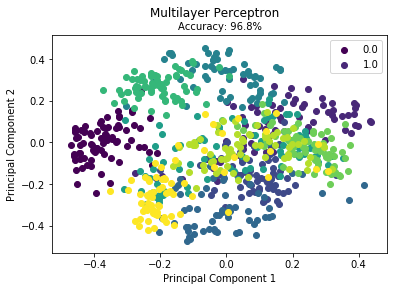

In [19]:
def main():
    data = datasets.load_digits()
    X = normalize(data.data)
    y = data.target

    # Convert the nominal y values to binary
    y = to_categorical(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, seed=1)

    # MLP
    clf = MultilayerPerceptron(n_hidden=16,
        n_iterations=1000,
        learning_rate=0.01)

    clf.fit(X_train, y_train)
    y_pred = np.argmax(clf.predict(X_test), axis=1)
    y_test = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    print ("Accuracy:", accuracy)

    # Reduce dimension to two using PCA and plot the results
    Plot().plot_in_2d(X_test, y_pred, title="Multilayer Perceptron", accuracy=accuracy, legend_labels=np.unique(y))

if __name__ == "__main__":
    main()